# Analysing Trail Run Results from cycosports

This is the second part of the analysis project. In the first part, the data was cleaned and prepared after retrieval from the source. Now, we will try to gain some insights from the data, by using a variety of plotting methods.

# 2. Analysing the data

We will conduct exploratory data analysis.

First, we import the necessary libraries and load the DataFrame.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import seaborn as sns
import session_info 

session_info.show(html=False)

-----
matplotlib          3.3.4
numpy               1.20.2
pandas              1.2.4
seaborn             0.11.1
session_info        1.0.0
-----
IPython             7.22.0
jupyter_client      6.1.12
jupyter_core        4.7.1
notebook            6.4.0
-----
Python 3.9.5 (default, May 18 2021, 14:42:02) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.19043-SP0
-----
Session information updated at 2021-08-21 18:31


In [2]:
df = pd.read_csv("results_clean.csv")

In [3]:
# Uncomment below in Jupyter Notebook to display all rows of tables:
# pd.set_option("display.max_rows", None) 
# Also, do not call .head()

# To undo it:
# pd.reset_option('display.max_rows')

In [4]:
df.head()

,category_rank,event_rank,name,club,start,lap_1,lap_2,time,distance,event,age,gender,category,bib_number
0,1,1,Malachy Kirwan,None,2021-04-04 07:16:17.700,00:21:09.20,00:21:55.00,00:43:04.20,10km,Open,13+,Male,Open,316
1,2,2,William Petty,Coached,2021-04-04 07:16:18.700,00:21:43.80,00:22:00.40,00:43:44.20,10km,Open,13+,Male,Open,267
2,3,4,Chris Timms,Dulwich Runners,2021-04-04 07:16:58.300,00:22:15.30,00:23:27.00,00:45:42.30,10km,Open,13+,Male,Open,251
3,4,6,Benoit Besnier,COS Coaching,2021-04-04 07:16:17.800,00:23:32.70,00:24:02.80,00:47:35.50,10km,Open,13+,Male,Open,320
4,5,7,Daniel Rose,Coached Fitness,2021-04-04 07:16:59.200,00:22:55.10,00:24:41.30,00:47:36.40,10km,Open,13+,Male,Open,311


## Converting the times to the Pandas timedelta object

We will opt to convert the entries into number of seconds taken to complete the race.

In [5]:
df[["lap_1", "lap_2", "time"]] = df[["lap_1", "lap_2", "time"]].apply(pd.to_timedelta)
df[["lap_1", "lap_2", "time"]] = df[["lap_1", "lap_2", "time"]].apply(lambda x: x.astype('timedelta64[s]'))

In [6]:
df.head()

,category_rank,event_rank,name,club,start,lap_1,lap_2,time,distance,event,age,gender,category,bib_number
0,1,1,Malachy Kirwan,None,2021-04-04 07:16:17.700,1269.0,1315.0,2584.0,10km,Open,13+,Male,Open,316
1,2,2,William Petty,Coached,2021-04-04 07:16:18.700,1303.0,1320.0,2624.0,10km,Open,13+,Male,Open,267
2,3,4,Chris Timms,Dulwich Runners,2021-04-04 07:16:58.300,1335.0,1407.0,2742.0,10km,Open,13+,Male,Open,251
3,4,6,Benoit Besnier,COS Coaching,2021-04-04 07:16:17.800,1412.0,1442.0,2855.0,10km,Open,13+,Male,Open,320
4,5,7,Daniel Rose,Coached Fitness,2021-04-04 07:16:59.200,1375.0,1481.0,2856.0,10km,Open,13+,Male,Open,311


## Focusing on the 10km runners

In [7]:
df["distance"].value_counts()

10km     114
3km       31
Name: distance, dtype: int64

The dataset contains both 10km and 3km runners. We will analyse the data of the 10km runners. (We first make a copy of the DataFrame to retain the full data.)

In [8]:
df_all_distances = df.copy()

In [9]:
df = df[df["distance"].str.contains("10km", na=False, regex=False)]

In [10]:
df.head()

,category_rank,event_rank,name,club,start,lap_1,lap_2,time,distance,event,age,gender,category,bib_number
0,1,1,Malachy Kirwan,None,2021-04-04 07:16:17.700,1269.0,1315.0,2584.0,10km,Open,13+,Male,Open,316
1,2,2,William Petty,Coached,2021-04-04 07:16:18.700,1303.0,1320.0,2624.0,10km,Open,13+,Male,Open,267
2,3,4,Chris Timms,Dulwich Runners,2021-04-04 07:16:58.300,1335.0,1407.0,2742.0,10km,Open,13+,Male,Open,251
3,4,6,Benoit Besnier,COS Coaching,2021-04-04 07:16:17.800,1412.0,1442.0,2855.0,10km,Open,13+,Male,Open,320
4,5,7,Daniel Rose,Coached Fitness,2021-04-04 07:16:59.200,1375.0,1481.0,2856.0,10km,Open,13+,Male,Open,311


In [11]:
df["distance"].value_counts()

10km     114
Name: distance, dtype: int64

A new dataframe was created as a subset of the initial one. We can see that there were 114 10km runners. 

## Droppping superfluous columns 

We will not be using several of the columns for the analysis. (We first make a copy of the DataFrame to retain all columns for any future reference before dropping the columns.)

In [12]:
df_before_drop = df.copy()

df = df.drop(columns=["category_rank", "event_rank", "start", "event", "category", "bib_number"])

In [13]:
df.head()

,name,club,lap_1,lap_2,time,distance,age,gender
0,Malachy Kirwan,None,1269.0,1315.0,2584.0,10km,13+,Male
1,William Petty,Coached,1303.0,1320.0,2624.0,10km,13+,Male
2,Chris Timms,Dulwich Runners,1335.0,1407.0,2742.0,10km,13+,Male
3,Benoit Besnier,COS Coaching,1412.0,1442.0,2855.0,10km,13+,Male
4,Daniel Rose,Coached Fitness,1375.0,1481.0,2856.0,10km,13+,Male


## What was the gender distribution like?

In [14]:
df["gender"].value_counts()

Male      76
Female    38
Name: gender, dtype: int64

We will represent this data in a plot:

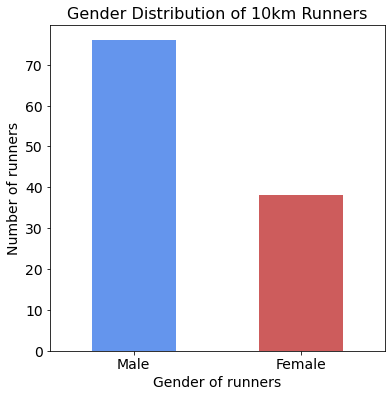

In [15]:
df["gender"].value_counts().plot(kind="bar", 
                                 figsize=(6,6),
                                 fontsize=14,
                                 color=["cornflowerblue", "indianred"])
plt.title("Gender Distribution of 10km Runners", fontsize=16)
plt.xlabel("Gender of runners", fontsize=14)
plt.ylabel("Number of runners", fontsize=14)
plt.xticks(rotation=0);

Here, we can see that the ratio of males to females was 2:1, meaning only a third of runners were female.

## How were the runners' timings distributed, visualised by gender?

To plot this, we would want the y-axis to show the number of runners, and the x-axis to show the timing in hours and minutes. 

There does not seem to be a direct way for the duration to appear on the x-axis as hours and minutes, which is more readable, instead of showing up as thousands of seconds. This problem may have been avoided if we were working with normal datetime objects. However, we want to simply work with the durations between time points, rather than time points. Hence, we use helper functions to format the data.

We will also want to plot the median timing for each gender. The median is chosen as it is less sensitive to outliers. 

In [16]:
def time_tick_formatter(x, pos):
    hours = int(x//3600)
    minutes = int((x%3600)//60)
    return "{:d}h:{:02d}m".format(hours, minutes)

In [17]:
def time_formatter(x):
    hours = int(x//3600)
    minutes = int((x%3600)//60)
    return "{:d}h:{:02d}m".format(hours, minutes)

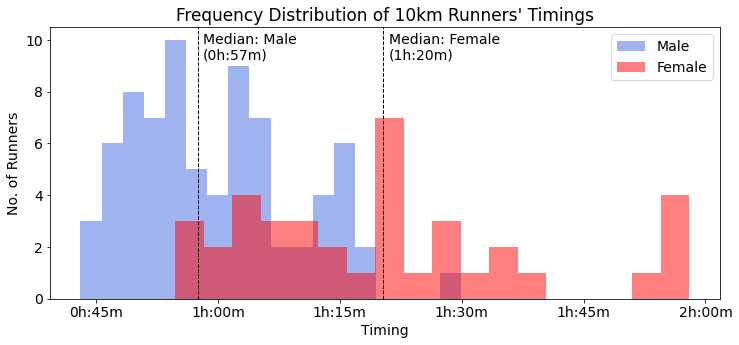

In [18]:
males = df.loc[df["gender"] == "Male", "time"]
females = df.loc[df["gender"] == "Female", "time"]

kwargs = dict(alpha=0.5, bins=18)
plt.hist(males, **kwargs, color="royalblue", label="Male")
plt.hist(females, **kwargs, color="r", label="Female")

plt.gcf().set_size_inches(12, 5)
plt.rcParams["font.size"] = 14
plt.tick_params(labelsize=14)

min_ylim, max_ylim = plt.ylim()
plt.axvline(males.median(), color="k", linestyle="dashed", linewidth=1)
plt.text(males.median()*1.01, max_ylim*0.88, "Median: Male \n({})".format(time_formatter(males.median())))
plt.axvline(females.median(), color="k", linestyle="dashed", linewidth=1)
plt.text(females.median()*1.01, max_ylim*0.88, "Median: Female \n({})".format(time_formatter(females.median())))

plt.title("Frequency Distribution of 10km Runners' Timings", fontsize=17)
plt.xlabel("Timing", fontsize=14)
plt.ylabel("No. of Runners", fontsize=14)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(time_tick_formatter))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=900))
plt.legend();

The plot reveals a visble difference between the male and female groups.

## How can we compare an individual's timing with the rest of the participants?

One of the valuable insights we can gain from analysing such data is how we compare against the rest of the participants. Hence, we will see how we can show the timing of one individual on the previous plot for comparison purposes. In this case, we will be using one of the individuals, Murphy, as an example.

In [19]:
df["time"][df["name"].str.contains("Murphy", na=False, regex=False)].count()

1

The timing of one individual is fetched by this line of code.

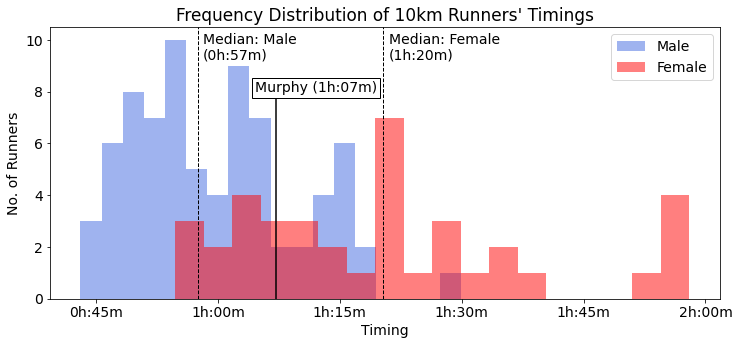

In [20]:
males = df.loc[df["gender"] == "Male", "time"]
females = df.loc[df["gender"] == "Female", "time"]
individual = df.loc[df["name"].str.contains("Murphy", na=False, regex=False)]

kwargs = dict(alpha=0.5, bins=18)
plt.hist(males, **kwargs, color="royalblue", label="Male")
plt.hist(females, **kwargs, color="r", label="Female")

plt.gcf().set_size_inches(12, 5)
plt.rcParams["font.size"] = 14
plt.tick_params(labelsize=14)

min_ylim, max_ylim = plt.ylim()
plt.axvline(males.median(), color="k", linestyle="dashed", linewidth=1)
plt.text(males.median()*1.01, max_ylim*0.88, "Median: Male \n({})".format(time_formatter(males.median())))
plt.axvline(females.median(), color="k", linestyle="dashed", linewidth=1)
plt.text(females.median()*1.01, max_ylim*0.88, "Median: Female \n({})".format(time_formatter(females.median())))
plt.vlines(individual["time"], ymin=0, ymax=8, color="k", linestyle="solid", linewidth=1.5)
plt.text(individual["time"]-150, 8, "Murphy ({})".format(time_formatter(individual["time"])), bbox={'facecolor': 'white', 'pad': 3})

plt.title("Frequency Distribution of 10km Runners' Timings", fontsize=17)
plt.xlabel("Timing", fontsize=14)
plt.ylabel("No. of Runners", fontsize=14)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(time_tick_formatter))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=900))
plt.legend();

Here, we can see that Murphy took longer to run 10km than the median timing for males. 

## How can we see which quartile of the gender group the individual belongs to?

What if we wanted more information, though, such as the exact quartile he was in amongst the males?

We can use boxplots, but in this case we will try a violin plot with a swarm plot instead. 

First, we will plot the general picture between males and females just to see:

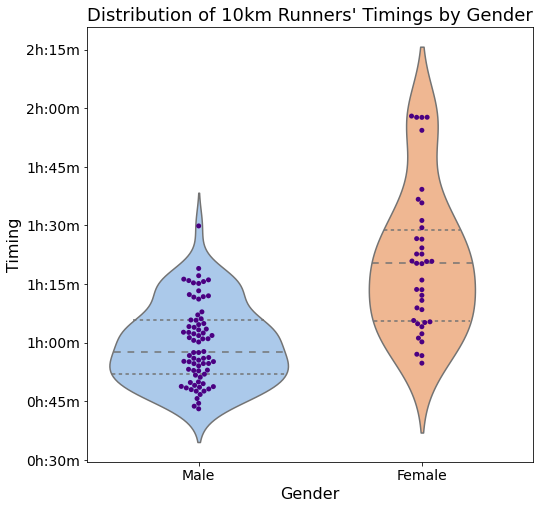

In [21]:
plt.figure(figsize=(8, 8), facecolor="w", edgecolor="k")
sns.violinplot(x="gender", y="time", data=df, inner="quartile", palette="pastel")
sns.swarmplot(x="gender", y="time", data=df, color="indigo")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Gender", fontsize=16)
plt.ylabel("Timing", fontsize=16)
plt.title("Distribution of 10km Runners' Timings by Gender", fontsize=18)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(time_tick_formatter))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=900));

We see that this is another way to visually communicate the distribution as distinct data points. It can be seen that there is a larger range for the female group.

Next, we will add Murphy into the plot for males:

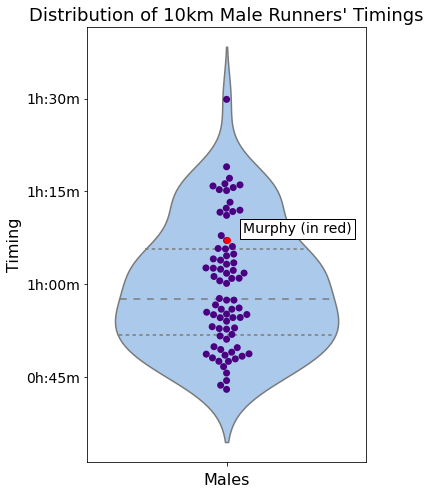

In [22]:
plt.figure(figsize=(5, 8), facecolor="w", edgecolor="k")
sns.violinplot(data=males, inner="quartile", palette="pastel")
sns.swarmplot(data=males, color="indigo", size=7)
sns.swarmplot(y="time", data=individual, color="r", size=7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Males", fontsize=16)
plt.ylabel("Timing", fontsize=16)
plt.title("Distribution of 10km Male Runners' Timings", fontsize=18)
plt.text(0.06, 4100, "Murphy (in red)", bbox={'facecolor': 'white', 'pad': 3})
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(time_tick_formatter))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=900));

Hence, we can see that Murphy was just slightly within the last 25% of male 10km runners.

## What was the age distribution like? Was the age distribution of male and female runners similar?

First, we create DataFrames for male and female runners respectively.

In [23]:
male_runners = df.loc[df["gender"] == "Male"]
female_runners = df.loc[df["gender"] == "Female"]

Then, we run some checks to see if we are getting what we want, and plot the graph:

In [24]:
male_runners.head()

,name,club,lap_1,lap_2,time,distance,age,gender
0,Malachy Kirwan,None,1269.0,1315.0,2584.0,10km,13+,Male
1,William Petty,Coached,1303.0,1320.0,2624.0,10km,13+,Male
2,Chris Timms,Dulwich Runners,1335.0,1407.0,2742.0,10km,13+,Male
3,Benoit Besnier,COS Coaching,1412.0,1442.0,2855.0,10km,13+,Male
4,Daniel Rose,Coached Fitness,1375.0,1481.0,2856.0,10km,13+,Male


In [25]:
female_runners.head()

,name,club,lap_1,lap_2,time,distance,age,gender
52,Samantha Collings,None,1961.0,1929.0,3890.0,10km,13+,Female
53,Sarah Boyle,None,2021.0,1899.0,3920.0,10km,13+,Female
54,Daphne Picq,COS Coaching,2011.0,2238.0,4249.0,10km,13+,Female
55,Cerys Shanley,Dulwich Runners,2077.0,2250.0,4327.0,10km,13+,Female
56,Ida Samsudin,None,2042.0,2370.0,4413.0,10km,13+,Female


In [26]:
df["age"].value_counts()

 13+    76
 40+    38
Name: age, dtype: int64

In [27]:
male_runners["age"].value_counts()

 13+    52
 40+    24
Name: age, dtype: int64

In [28]:
female_runners["age"].value_counts()

 13+    24
 40+    14
Name: age, dtype: int64

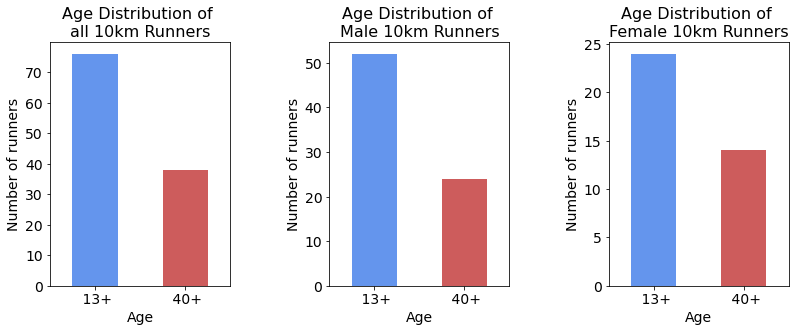

In [29]:
fig, ax = plt.subplots(1, 3)


plt.subplot(1, 3, 1)
df["age"].value_counts().plot(kind="bar", 
                                 figsize=(7, 4.5),
                                 fontsize=14,
                                 color=["cornflowerblue", "indianred"])
plt.title("Age Distribution of \nall 10km Runners", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Number of runners", fontsize=14)
plt.xticks(rotation=0);

plt.subplot(1, 3, 2)
male_runners["age"].value_counts().plot(kind="bar", 
                                 figsize=(7, 4.5),
                                 fontsize=14,
                                 color=["cornflowerblue", "indianred"])
plt.title("Age Distribution of \nMale 10km Runners", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Number of runners", fontsize=14)
plt.xticks(rotation=0);

plt.subplot(1, 3, 3)
female_runners["age"].value_counts().plot(kind="bar", 
                                 figsize=(7, 4.5),
                                 fontsize=14,
                                 color=["cornflowerblue", "indianred"])
plt.title("Age Distribution of \nFemale 10km Runners", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Number of runners", fontsize=14)
plt.xticks(rotation=0);

fig.tight_layout()
plt.gcf().set_size_inches(12, 5)

It seems that the ratio of runners aged 13+ to runners aged 40+ is similar to that of males to females. The proportion of runners aged 40+ was slightly higher in the female group, based on the normalised "13+" bars between the plots. 

For the avoidance of ambiguity, runners aged 13+ are of age 13-39, and runners aged 40+ are of age 40 and above.

## Did the younger runners have better timings? 

First, we create a DataFrame to specify the older group, and then we plot them on the violin and swarm plot.

In [30]:
older = df[df["age"].str.contains("40+", na=False, regex=False)]

In [31]:
older.head()

,name,club,lap_1,lap_2,time,distance,age,gender
76,Dan Smith,matadorRACING,1440.0,1438.0,2879.0,10km,40+,Male
77,Ken Forbes,None,1406.0,1482.0,2889.0,10km,40+,Male
78,Tom Chamberlain,Trail & Error,1523.0,1643.0,3167.0,10km,40+,Male
79,Tony Seakins,Shufflers,1567.0,1624.0,3191.0,10km,40+,Male
80,Careca Yong Loi Huat,Nil,1617.0,1662.0,3280.0,10km,40+,Male


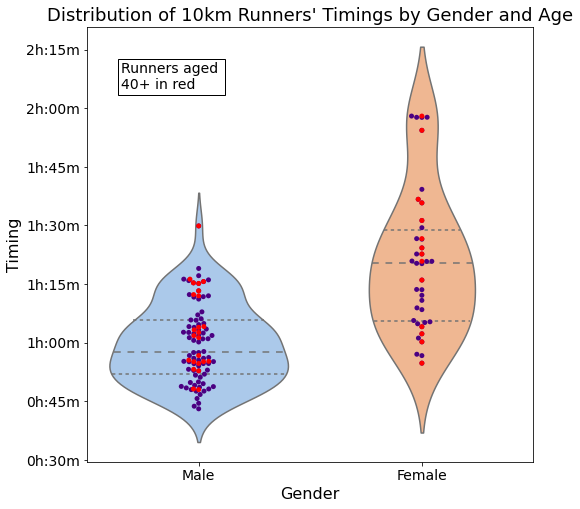

In [32]:
plt.figure(figsize=(8, 8), facecolor="w", edgecolor="k")
sns.violinplot(x="gender", y="time", data=df, inner="quartile", palette="pastel")
sns.swarmplot(x="gender", y="time", data=df, color="indigo")
sns.swarmplot(x="gender", y="time", data=older, color="r")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Gender", fontsize=16)
plt.ylabel("Timing", fontsize=16)
plt.title("Distribution of 10km Runners' Timings by Gender and Age", fontsize=18)
plt.text(-0.35, 7500, "Runners aged \n40+ in red ", bbox={'facecolor': 'white', 'pad': 3})
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(time_tick_formatter))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=900))

At first glance, the timings of the runners 40 and above (in red) are spread out throughout the groups. 

Upon closer inspection, for the males, the fastest few runners were younger. The runner who took the longest belonged to the older group. 

In comparison, for the females, the older runners are spread out throughout the whole range of female runners. In fact, the fastest runner for the females was from the older group (and also from a club, if we refer to one of the previous analyses). There was a runner aged 40 or above at the tail end of the female group, but there were 4 other runners there who were below 40. 

We can also get a quantitative metric by calculating the median. We will create DataFrames for subsets of the data.

In [33]:
males_13 = male_runners[male_runners["age"].str.contains("13+", na=False, regex=False)]
males_40 = male_runners[male_runners["age"].str.contains("40+", na=False, regex=False)]
females_13 = female_runners[female_runners["age"].str.contains("13+", na=False, regex=False)]
females_40 = female_runners[female_runners["age"].str.contains("40+", na=False, regex=False)]

## For males:

**Median running time for male runners aged 13+:**

In [34]:
time_formatter(males_13["time"].median())

'0h:56m'

**Median running time for male runners aged 40+:**

In [35]:
time_formatter(males_40["time"].median())

'1h:02m'

## For females:

**Median running time for female runners aged 13+:**

In [36]:
time_formatter(females_13["time"].median())

'1h:13m'

**Median running time for female runners aged 40+:**

In [37]:
time_formatter(females_40["time"].median())

'1h:23m'

Here, we can see that the median timings for the runners below 40 were indeed less than those 40 and above. In the analysis with the swarm plot, we were able to get some information from the tail ends of the data (such as the first and last few in place), but it seems that the median value did not reveal these nuances. For example, the fastest runner for the females was actually 40 or above, and the slowest were also below 40, despite the respective median hinting otherwise. This is because the swarm plot is able to show individual data points, and the median is not very sensitive to outliers at the far ranges of the data. 

## What was the proportion of runners in clubs?

Firstly, let us look at how the runners were distributed:

In [38]:
df["club"].value_counts()

None                          74
Dulwich Runners                8
COS Coaching                   3
Shufflers                      3
Shelfordians                   3
Filipino Runners               2
Coached                        2
Filipino runners Singapore     1
Run with no shoes in           1
Salomon Singapore              1
Team Grit OCR                  1
Simply Active                  1
Singapore Shufflers            1
AWA                            1
Trail & Error                  1
ANZA                           1
Metasport                      1
Tower running SG               1
Credo Endurance                1
AWT3                           1
matadorRACING                  1
Cos coaching                   1
FILIPINO RUNNERS               1
Coached Fitness                1
Nil                            1
Alpoint Racing                 1
Name: club, dtype: int64

Most clubs sent one representative. To simplify, we will create a new column to indicate only whether or not a runner is in a club. 

First, we copy the "club" column as "club_membership", to be futher modified:

In [39]:
df["club_membership"] = df["club"].copy()

One of the clubs is called "Nil". Another is called "Run with no shoes in". We will have to convert them to "None" in the column. 

In [40]:
df["club_membership"] = df["club_membership"].replace(to_replace="Nil", value="None", regex=False)
df["club_membership"] = df["club_membership"].replace(to_replace="Run with no shoes in", value="None", regex=False)

df["club_membership"].value_counts()

None                          76
Dulwich Runners                8
COS Coaching                   3
Shufflers                      3
Shelfordians                   3
Coached                        2
Filipino Runners               2
Simply Active                  1
Credo Endurance                1
AWT3                           1
Coached Fitness                1
Salomon Singapore              1
Team Grit OCR                  1
Alpoint Racing                 1
Singapore Shufflers            1
Cos coaching                   1
Filipino runners Singapore     1
FILIPINO RUNNERS               1
Tower running SG               1
Trail & Error                  1
ANZA                           1
Metasport                      1
AWA                            1
matadorRACING                  1
Name: club_membership, dtype: int64

The values are converted. Then, we change the values of all entries in the column with club names to "Member".

In [41]:
df["club_membership"].where((df["club_membership"] == "None"), other="Member", inplace=True)

In [42]:
df.head()

,name,club,lap_1,lap_2,time,distance,age,gender,club_membership
0,Malachy Kirwan,None,1269.0,1315.0,2584.0,10km,13+,Male,None
1,William Petty,Coached,1303.0,1320.0,2624.0,10km,13+,Male,Member
2,Chris Timms,Dulwich Runners,1335.0,1407.0,2742.0,10km,13+,Male,Member
3,Benoit Besnier,COS Coaching,1412.0,1442.0,2855.0,10km,13+,Male,Member
4,Daniel Rose,Coached Fitness,1375.0,1481.0,2856.0,10km,13+,Male,Member


We have created the column. Now, let us check out the distribution. 

In [43]:
df["club_membership"].value_counts()

None      76
Member    38
Name: club_membership, dtype: int64

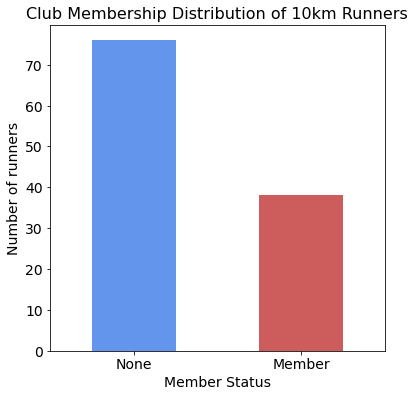

In [44]:
df["club_membership"].value_counts().plot(kind="bar", 
                                 figsize=(6,6),
                                 fontsize=14,
                                 color=["cornflowerblue", "indianred"])
plt.title("Club Membership Distribution of 10km Runners", fontsize=16)
plt.xlabel("Member Status", fontsize=14)
plt.ylabel("Number of runners", fontsize=14)
plt.xticks(rotation=0);

Coincidentally, we see a 2:1 ratio again. A third of the runners were in running clubs. 

## Did the runners in clubs have better timings?

Let's highlight the club members in the violin and swarm plot. First, we get the data of only the members, then we plot it:

In [45]:
members = df.loc[df["club_membership"] == "Member"]

In [46]:
members.head()

,name,club,lap_1,lap_2,time,distance,age,gender,club_membership
1,William Petty,Coached,1303.0,1320.0,2624.0,10km,13+,Male,Member
2,Chris Timms,Dulwich Runners,1335.0,1407.0,2742.0,10km,13+,Male,Member
3,Benoit Besnier,COS Coaching,1412.0,1442.0,2855.0,10km,13+,Male,Member
4,Daniel Rose,Coached Fitness,1375.0,1481.0,2856.0,10km,13+,Male,Member
6,Ian Stewart,Dulwich Runners,1407.0,1537.0,2944.0,10km,13+,Male,Member


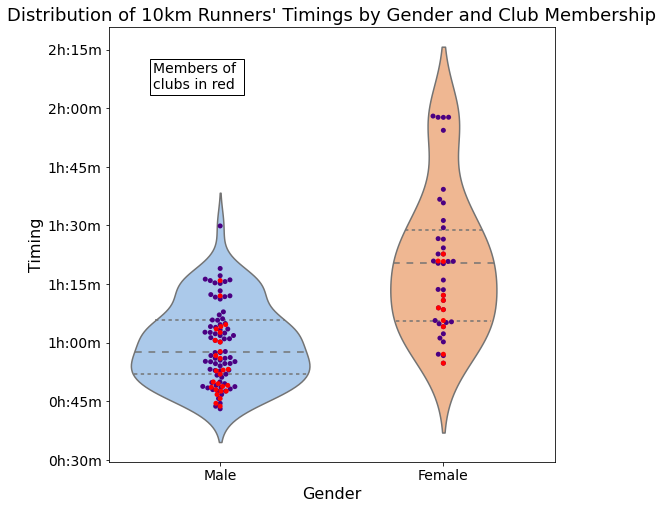

In [47]:
plt.figure(figsize=(8, 8), facecolor="w", edgecolor="k")
sns.violinplot(x="gender", y="time", data=df, inner="quartile", palette="pastel")
sns.swarmplot(x="gender", y="time", data=df, color="indigo")
sns.swarmplot(x="gender", y="time", data=members, color="r")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Gender", fontsize=16)
plt.ylabel("Timing", fontsize=16)
plt.title("Distribution of 10km Runners' Timings by Gender and Club Membership", fontsize=18)
plt.text(-0.3, 7500, "Members of \nclubs in red ", bbox={'facecolor': 'white', 'pad': 3})
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(time_tick_formatter))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=900))

Here, we can see that the club members were clustered more towards the front in both the male and female groups, thus showing that they were generally faster runners. The fastest runner for the female group was from a club. 

Can we quantitatively determine this? We can compare the median running timings between the members and non-members.

First, we extract the non-members into a DataFrame. Then, we get the median timings of both groups by gender.

In [48]:
non_members = df.loc[df["club_membership"] == "None"]

In [49]:
non_members.head()

,name,club,lap_1,lap_2,time,distance,age,gender,club_membership
0,Malachy Kirwan,None,1269.0,1315.0,2584.0,10km,13+,Male,None
5,Stanislav Miroshnichenko,None,1462.0,1463.0,2925.0,10km,13+,Male,None
7,Tycen Bundgaard,None,1501.0,1487.0,2988.0,10km,13+,Male,None
9,Anish Jha,None,1528.0,1540.0,3069.0,10km,13+,Male,None
10,Jonathan Eudeline,None,1532.0,1569.0,3101.0,10km,13+,Male,None


## For males:

**Median running time for males NOT in clubs:**

In [50]:
time_formatter(non_members.loc[df["gender"] == "Male", "time"].median())

'1h:01m'

**Median running time for males in clubs:**

In [51]:
time_formatter(members.loc[df["gender"] == "Male", "time"].median())

'0h:52m'

## For females:

**Median running time for females NOT in clubs:**

In [52]:
time_formatter(non_members.loc[df["gender"] == "Female", "time"].median())

'1h:22m'

**Median running time for females in clubs:**

In [53]:
time_formatter(members.loc[df["gender"] == "Female", "time"].median())

'1h:08m'

Thus, we can see that by gender, the median times were faster for those in clubs.

## Did the club members have a different gender distribution as a group compared to non members?

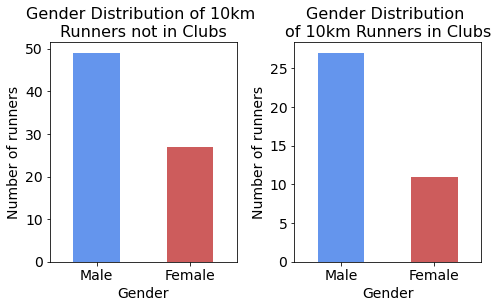

In [54]:
fig, ax = plt.subplots(1, 2)

plt.subplot(1, 2, 1)
non_members["gender"].value_counts().plot(kind="bar", 
                                 figsize=(7, 4.5),
                                 fontsize=14,
                                 color=["cornflowerblue", "indianred"])
plt.title("Gender Distribution of 10km \nRunners not in Clubs", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Number of runners", fontsize=14)
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)
members["gender"].value_counts().plot(kind="bar", 
                                 figsize=(7, 4.5),
                                 fontsize=14,
                                 color=["cornflowerblue", "indianred"])
plt.title("Gender Distribution \nof 10km Runners in Clubs", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Number of runners", fontsize=14)
plt.xticks(rotation=0);

fig.tight_layout()

Based on the normalised "Male" bars between both plots, we can see that the female proportion in clubs was slightly less than the group that was not in clubs. 

## Do the club members have a different age distribution as a group compared to non members?

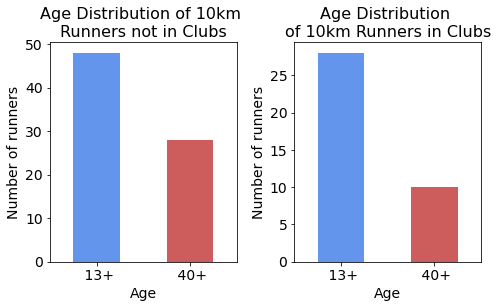

In [55]:
fig, ax = plt.subplots(1, 2)

plt.subplot(1, 2, 1)
non_members["age"].value_counts().plot(kind="bar", 
                                 figsize=(7, 4.5),
                                 fontsize=14,
                                 color=["cornflowerblue", "indianred"])
plt.title("Age Distribution of 10km \nRunners not in Clubs", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Number of runners", fontsize=14)
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)
members["age"].value_counts().plot(kind="bar", 
                                 figsize=(7, 4.5),
                                 fontsize=14,
                                 color=["cornflowerblue", "indianred"])
plt.title("Age Distribution \nof 10km Runners in Clubs", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Number of runners", fontsize=14)
plt.xticks(rotation=0);

fig.tight_layout()

Based on the normalised "13+" bars between both plots, we can see that the there was a slightly greater proportion of younger runners in clubs. 

## Amongst the club members, how were the older runners doing? 

First, we create a DataFrame to specify the older group, and then we plot them on the violin and swarm plot.

In [56]:
older_members = members[members["age"].str.contains("40+", na=False, regex=False)]

In [57]:
older_members

,name,club,lap_1,lap_2,time,distance,age,gender,club_membership
76,Dan Smith,matadorRACING,1440.0,1438.0,2879.0,10km,40+,Male,Member
78,Tom Chamberlain,Trail & Error,1523.0,1643.0,3167.0,10km,40+,Male,Member
79,Tony Seakins,Shufflers,1567.0,1624.0,3191.0,10km,40+,Male,Member
85,Wei Chong Chin,Salomon Singapore,1610.0,1792.0,3402.0,10km,40+,Male,Member
88,Dean Collins,Coached,1783.0,1974.0,3757.0,10km,40+,Male,Member
91,Alvin Wong,Alpoint Racing,1800.0,2047.0,3847.0,10km,40+,Male,Member
92,Conor Delahunty,ANZA,1932.0,2387.0,4319.0,10km,40+,Male,Member
100,Itsuko Tanaka,Metasport,1610.0,1675.0,3285.0,10km,40+,Female,Member
103,Delia Jayme Toledo,Tower running SG,1878.0,1966.0,3845.0,10km,40+,Female,Member
106,Nikki Elliott,AWA,2341.0,2620.0,4961.0,10km,40+,Female,Member


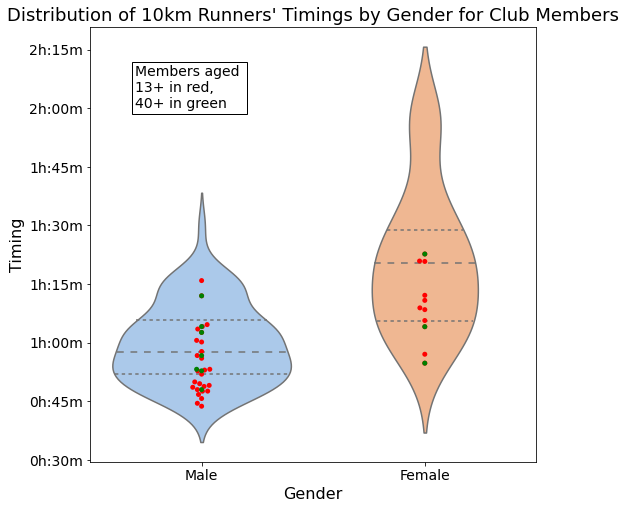

In [58]:
plt.figure(figsize=(8, 8), facecolor="w", edgecolor="k")
sns.violinplot(x="gender", y="time", data=df, inner="quartile", palette="pastel")
sns.swarmplot(x="gender", y="time", data=members, color="r")
sns.swarmplot(x="gender", y="time", data=older_members, color="g")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Gender", fontsize=16)
plt.ylabel("Timing", fontsize=16)
plt.title("Distribution of 10km Runners' Timings by Gender for Club Members", fontsize=18)
plt.text(-0.30, 7200, "Members aged \n13+ in red, \n40+ in green", bbox={'facecolor': 'white', 'pad': 3})
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(time_tick_formatter))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=900))

The sample size for runners in clubs aged 40 and above is small, but from the plot, the age-related observations for both males and females seem to mirror what was seen when the analysis was done on all 10km runners. 

## Controlling for the effect of age group (and gender), was membership in a club indicative of better timings?

## For males aged 13+:

**Median running time for males aged 13+ NOT in clubs:**

In [59]:
time_formatter(males_13.loc[df["club_membership"] == "None", "time"].median())

'1h:01m'

**Median running time for males aged 13+ in clubs:**

In [60]:
time_formatter(males_13.loc[df["club_membership"] == "Member", "time"].median())

'0h:49m'

## For males aged 40+:

**Median running time for males aged 40+ NOT in clubs:**

In [61]:
time_formatter(males_40.loc[df["club_membership"] == "None", "time"].median())

'1h:03m'

**Median running time for males aged 40+ in clubs:**

In [62]:
time_formatter(males_40.loc[df["club_membership"] == "Member", "time"].median())

'0h:56m'

## For females aged 13+:

**Median running time for females aged 13+ NOT in clubs:**

In [63]:
time_formatter(females_13.loc[df["club_membership"] == "None", "time"].median())

'1h:20m'

**Median running time for females aged 13+ in clubs:**

In [64]:
time_formatter(females_13.loc[df["club_membership"] == "Member", "time"].median())

'1h:09m'

## For females aged 40+:

**Median running time for females aged 40+ NOT in clubs:**

In [65]:
time_formatter(females_40.loc[df["club_membership"] == "None", "time"].median())

'1h:26m'

**Median running time for females aged 40+ in clubs:**

In [66]:
time_formatter(females_40.loc[df["club_membership"] == "Member", "time"].median())

'1h:04m'

For each pair of comparisons, the runners in clubs had a lower median timing. Hence, based on the median, we can conclude that membership in a club was indicative of better timings (after having controlled for age and gender). 

There was a greater difference for females aged 40+ between being a club member versus not being one, as compared to the comparisons made in the other groups. 

## How did the first lap of runners compare to their second lap?

Since we have the split timings, we can plot them against each other. It is a split because there were only two laps. 

We can add a bisecting dotted line to show where a runner would be if they took an equal duration for both the laps. 

Let us also highlight Murphy on the plot. 

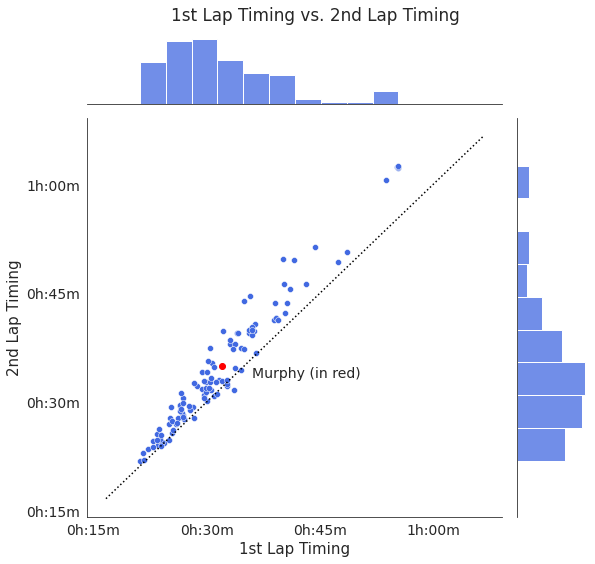

In [67]:
with sns.axes_style("white"):
    g = sns.jointplot(x="lap_1", y="lap_2", data=df, kind="scatter", height=8, color="royalblue")
    g.ax_joint.scatter(x="lap_1", y="lap_2", data=individual, color = 'red')
    g.ax_joint.plot(np.linspace(1000, 4000),
                    np.linspace(1000, 4000), ":k")
    g.fig.suptitle("1st Lap Timing vs. 2nd Lap Timing")
    ax1 =g.ax_marg_x
    ax2 = g.ax_marg_y
    ax1.xaxis.set_major_formatter(ticker.FuncFormatter(time_tick_formatter))
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=900))
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(time_tick_formatter))
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(base=900))
    g.fig.subplots_adjust(top=0.93) 
    # Without adjusting, the title overlaps with the plot
    plt.text(-105, 2000, "Murphy (in red)")
    g.ax_joint.set_xlabel("1st Lap Timing", fontsize=15)
    g.ax_joint.set_ylabel("2nd Lap Timing", fontsize=15);

Most of the runners took a longer duration in the 2nd lap, which was logical since they would probably have been fatigued from the first lap. They are on the upper side of the bisecting dotted line. However, it seems some runners actually ran _faster_ in the second lap.

## Who were the runners who ran faster in their second lap?

First, we create a new column of "split_fraction", which is 1 minus the ratio of the first lap to the second lap. A positive value means that the first lap took less time. Thus, the runners with a negative value were the ones who took less time (and thus ran faster) in their second lap.

In [68]:
df["split_fraction"] = 1 - df["lap_1"]/df["lap_2"]

In [69]:
df.head()

,name,club,lap_1,lap_2,time,distance,age,gender,club_membership,split_fraction
0,Malachy Kirwan,None,1269.0,1315.0,2584.0,10km,13+,Male,None,0.034981
1,William Petty,Coached,1303.0,1320.0,2624.0,10km,13+,Male,Member,0.012879
2,Chris Timms,Dulwich Runners,1335.0,1407.0,2742.0,10km,13+,Male,Member,0.051173
3,Benoit Besnier,COS Coaching,1412.0,1442.0,2855.0,10km,13+,Male,Member,0.020804
4,Daniel Rose,Coached Fitness,1375.0,1481.0,2856.0,10km,13+,Male,Member,0.071573


We can plot a histogram to get an idea of the distribution of postitive versus negative values (the dotted vertical line is 0). 

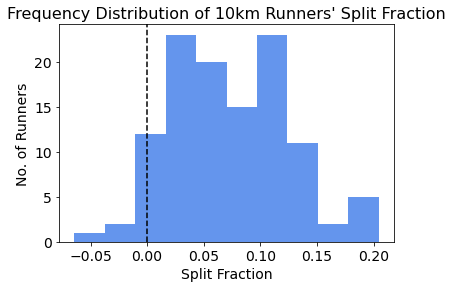

In [70]:
plt.hist(df["split_fraction"], color="cornflowerblue", bins=10)
plt.gcf().set_size_inches(6, 4)
plt.axvline(0, color="k", linestyle="--")
plt.title("Frequency Distribution of 10km Runners' Split Fraction", fontsize=16)
plt.xlabel("Split Fraction", fontsize=14)
plt.ylabel("No. of Runners", fontsize=14);

The values are roughly normally or bimodally distributed, with a minority having run faster in the second lap. 

We can make a count of this minority:

In [71]:
sum(df['split_fraction']<0)

9

This is less than one percent of the 114 runners. Let's see who the 9 runners were.

In [72]:
negative_splitters = df[df['split_fraction']<0]

In [73]:
negative_splitters

,name,club,lap_1,lap_2,time,distance,age,gender,club_membership,split_fraction
7,Tycen Bundgaard,None,1501.0,1487.0,2988.0,10km,13+,Male,None,-0.009415
18,David Wager,None,1702.0,1669.0,3372.0,10km,13+,Male,None,-0.019772
26,Mathieu Borris,None,1858.0,1852.0,3710.0,10km,13+,Male,None,-0.003240
27,Vignesh Karunamoorthy,None,1881.0,1866.0,3747.0,10km,13+,Male,None,-0.008039
52,Samantha Collings,None,1961.0,1929.0,3890.0,10km,13+,Female,None,-0.016589
53,Sarah Boyle,None,2021.0,1899.0,3920.0,10km,13+,Female,None,-0.064244
63,Véronique Gille,None,1963.0,1946.0,3909.0,10km,13+,Female,None,-0.008736
66,Nicola Wilson,Dulwich Runners,2073.0,2061.0,4134.0,10km,13+,Female,Member,-0.005822
76,Dan Smith,matadorRACING,1440.0,1438.0,2879.0,10km,40+,Male,Member,-0.001391


It seems that only one of them was 40+ in age and 2 were in clubs. These proportions are less than what was seen from the whole 10km group. The gender distribution is pretty even, which means that the female representation is higher than in the whole 10km group. 

We can highlight them on the swarm plot to see where they were in the cohort.

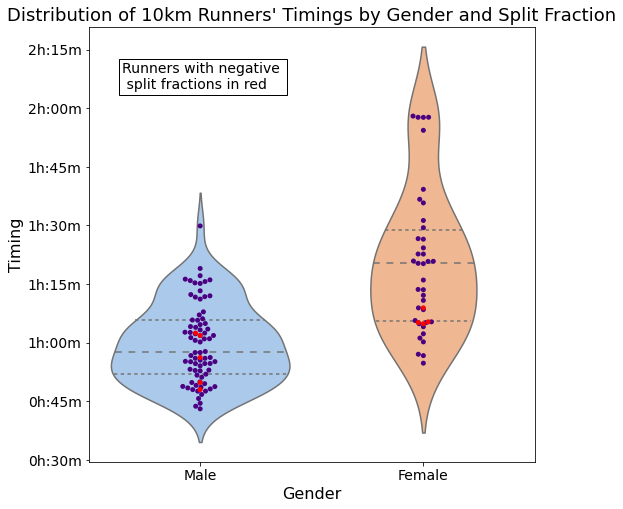

In [74]:
plt.figure(figsize=(8, 8), facecolor="w", edgecolor="k")
sns.violinplot(x="gender", y="time", data=df, inner="quartile", palette="pastel")
sns.swarmplot(x="gender", y="time", data=df, color="indigo")
sns.swarmplot(x="gender", y="time", data=negative_splitters, color="r")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Gender", fontsize=16)
plt.ylabel("Timing", fontsize=16)
plt.title("Distribution of 10km Runners' Timings by Gender and Split Fraction", fontsize=18)
plt.text(-0.35, 7500, "Runners with negative \n split fractions in red ", bbox={'facecolor': 'white', 'pad': 3})
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(time_tick_formatter))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=900))

Here, we can see that the males were quite spread out throughout the top 75 percent of the male population. In comparison, the females were somewhat clustered at the 25th percentile. For both genders, the runners were not in the top 5.

## Conclusion

The dataset of 10km runners contained a larger representation (twice as many) of runners who were male, below 40 and not from running clubs. 

From this analysis, we can see that the gender groupings had their own distinct features, such as the range and the median. There was a wider range for females, and the median timing for males was 23min less than for females. We also observed the data demarcated by quartiles, and how an individual could be compared with the rest of their group.

The age distribution (split into runners aged 13-39 and 40+) did not drastically differ between males and females, with just a slightly higher proportion of runners aged 40+ for females. However, the way the runners were spread out within their gender group differed. For the males, the fastest few runners were aged 13-39, and the slowest was 40 or above. For the females, however, the runners 40 and above spanned the full range of the gender group. The fastest female 10km runner was 40 or above. When the median timings were calculated, it was lower for runners aged 13-39 for both genders. 

It was found that the runners in clubs were generally faster for both gender groups. For the males, they were seen to dominate the 1st quartile of their gender. For the females, almost all were in the fastest 50% of their gender. For the runners from clubs alone, observations made about the age of the fastest and slowest runners in each gender group were similar to those made when the runners not in clubs were also included. Controlling for age and gender, membership in a club was indicative of faster timings based on the sample medians. This may be because being in a club provides access to structured group training, which may have been a contributing factor to these runners generally having better timings. 

Among club members as a whole, there were slightly less females and those 40 and above as compared to the group of runners not in clubs. 

Race split analysis indicated that a large majority of runners took a longer time to run their second lap (out of two laps in total). Only less than one percent ran their second lap faster than their first lap. They were not among the top 5 runners for each gender. 